# 無重疊年份的 Features 迴歸

In [2]:
import pandas as pd
import numpy as np

In [3]:
hm_features_overlapping = pd.read_csv('../output_dataset/handmade_features_overlapping_score_v1.csv')
hm_features_non_overlapping = pd.read_csv('../output_dataset/handmade_features_non_overlapping_score_v1.csv')
greenwash_score = pd.read_csv('../CSR_score/common_score_ESG_all.csv', index_col=0)

In [4]:
# 先過濾資料列
hm_features_non_overlapping_filtered = hm_features_non_overlapping[
    hm_features_non_overlapping['greenwash_score'].notna() & 
    (hm_features_non_overlapping['greenwash_score'] != 0)
]

# 再過濾欄位名稱中不包含 ESGBERT 的欄位
cols_to_keep = [col for col in hm_features_non_overlapping_filtered.columns if 'ESGBERT' not in col]
hm_features_non_overlapping_filtered = hm_features_non_overlapping_filtered[cols_to_keep]

hm_features_non_overlapping_filtered

,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,exchange,ticker,year1,greenwash_score
0,NASDAQ_AAL_2007,0.053097,11.493192,10.16,35.27,14.9,13.6,0.089870,0.357918,92,35,1042,656,45,NASDAQ,AAL,2007,-32.270374
1,NASDAQ_AAL_2008,0.016026,11.929245,11.20,32.22,16.2,15.4,0.123671,0.376547,122,52,1468,947,50,NASDAQ,AAL,2008,-42.852530
2,NASDAQ_AAL_2009,0.007839,12.027759,11.22,23.16,17.0,16.5,0.135470,0.350482,169,55,1716,863,37,NASDAQ,AAL,2009,-38.978609
3,NASDAQ_AAL_2011,0.008729,12.193003,11.05,23.36,16.5,16.1,0.135360,0.340213,165,98,1838,1090,92,NASDAQ,AAL,2011,-51.990725
4,NASDAQ_AAL_2012,0.020833,11.362963,13.82,18.18,17.9,18.7,0.134983,0.325716,72,43,769,498,37,NASDAQ,AAL,2012,-55.278625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,NYSE_ZBH_2018,0.017857,10.177742,13.82,17.23,17.0,18.7,0.106151,0.337029,11,13,262,122,2,NYSE,ZBH,2018,-10.097574
5886,NYSE_ZBH_2019,0.000000,10.152416,14.24,16.02,17.5,18.1,0.116508,0.335082,10,10,246,117,2,NYSE,ZBH,2019,-18.122333
5887,NYSE_ZBH_2020,0.000000,11.270166,12.60,15.00,17.3,18.3,0.109626,0.360005,22,23,754,424,14,NYSE,ZBH,2020,-9.314189
5888,NYSE_ZBH_2021,0.015038,11.366014,12.50,14.80,17.3,18.2,0.109250,0.341078,32,26,812,465,10,NYSE,ZBH,2021,-8.644310


In [5]:
hm_features_non_overlapping_filtered.describe()


,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,year1,greenwash_score
count,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000
mean,0.015954,11.449376,12.468365,22.809969,17.313509,17.316667,0.123622,0.378462,68.829151,29.747386,1249.067963,709.965496,30.024885,2017.416353,-9.475673
std,0.020522,0.870977,1.566987,7.326722,1.262651,1.979871,0.031947,0.034260,62.862392,24.829083,1031.431278,674.563525,32.387524,3.580725,15.824066
min,0.000000,7.142827,8.190000,-23.270000,11.000000,7.300000,-0.074925,0.209079,0.000000,0.000000,3.000000,2.000000,0.000000,2005.000000,-55.379176
25%,0.004887,10.926388,11.480000,19.200000,16.500000,16.100000,0.104303,0.357512,26.000000,13.000000,558.000000,288.250000,10.000000,2016.000000,-19.733524
50%,0.009962,11.535709,12.340000,22.340000,17.300000,17.200000,0.122768,0.378707,51.000000,23.000000,998.000000,539.000000,20.000000,2019.000000,-10.581904
75%,0.019474,12.053721,13.250000,27.320000,18.000000,18.400000,0.141638,0.398675,90.000000,40.000000,1633.000000,920.750000,39.000000,2020.000000,-0.746469
max,0.358974,13.934756,29.270000,59.640000,27.200000,35.900000,0.302110,0.558839,537.000000,282.000000,11073.000000,8047.000000,374.000000,2022.000000,69.294881


R2: 0.08351648574552228
MSE: 229.44044418387767
                            Feature  Coefficient
4                  readability_smog     3.849944
13                            year1     3.320759
1                            length    -2.561365
8                       comparative    -2.294788
2                   readability_fog    -2.182240
7            sentiment_subjectivity     1.892536
11                             past     1.878927
6                sentiment_polarity    -1.509080
3   readability_flesch_reading_ease     1.300075
10                          present     1.294411


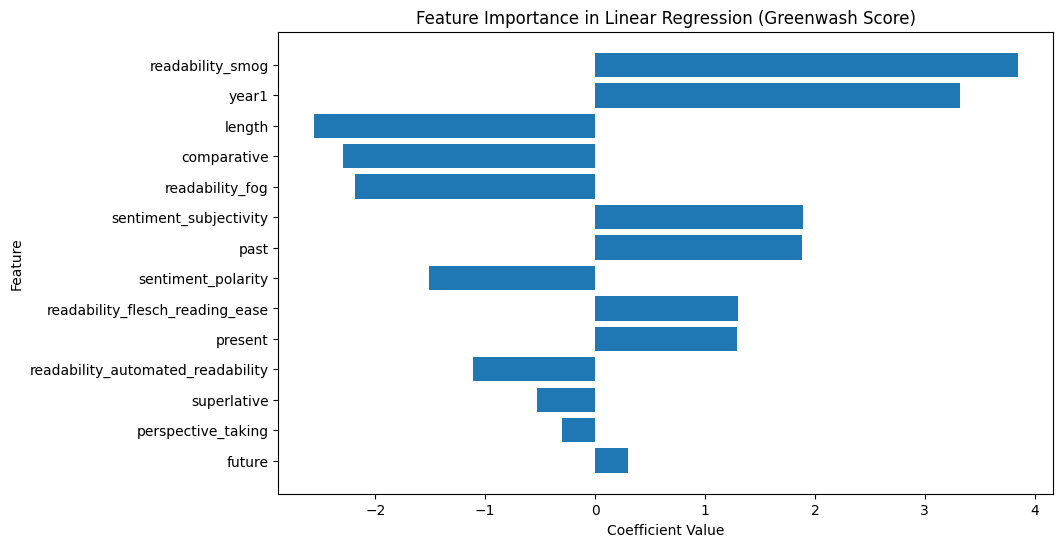

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 讀取數據
df = hm_features_non_overlapping_filtered.copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()


In [7]:
hm_features_overlapping_filtered = hm_features_overlapping[
    hm_features_overlapping['greenwash_score_mean'].notna() & 
    (hm_features_overlapping['greenwash_score_mean'] != 0)
]
# rename greenwash_score_mean to greenwash_score
hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
# 再過濾欄位名稱中不包含 ESGBERT 的欄位
cols_to_keep = [col for col in hm_features_non_overlapping_filtered.columns if 'ESGBERT' not in col]
hm_features_overlapping_filtered = hm_features_overlapping_filtered[cols_to_keep]
hm_features_overlapping_filtered

/tmp/ipykernel_320065/3126218814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)


,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,exchange,ticker,year1,greenwash_score
0,NASDAQ_AAON_2018_2019,0.000000,9.762960,13.35,24.68,16.4,16.5,0.156427,0.392142,9,2,199,82,1,NASDAQ,AAON,2018,2.257378
1,NASDAQ_AAON_2019_2020,0.000000,9.788694,13.78,17.23,16.4,16.1,0.125374,0.345194,4,1,221,77,3,NASDAQ,AAON,2019,-5.019973
2,NASDAQ_AAON_2020_2021,0.010695,10.649464,12.97,23.26,16.6,16.3,0.147133,0.389628,10,6,406,215,12,NASDAQ,AAON,2020,-5.080205
3,NASDAQ_AAON_2021_2022,0.004785,10.841872,11.78,33.44,15.7,15.1,0.117348,0.401911,17,22,500,272,10,NASDAQ,AAON,2021,-6.331358
4,NASDAQ_AAWW_2018_2019,0.007968,11.172588,13.06,21.02,17.6,18.0,0.126938,0.365562,38,32,831,320,9,NASDAQ,AAWW,2018,4.854945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,NYSE_KMX_20210301_20220228,0.010922,11.457233,14.06,9.01,19.3,19.9,0.166608,0.421410,28,31,1035,468,12,NYSE,KMX,2021,-15.963478
173,NYSE_KO_2012_2013,0.019231,8.795128,13.81,26.00,15.8,15.1,0.154998,0.394752,13,2,67,33,1,NYSE,KO,2012,-22.629175
174,NYSE_KO_2014_2015,0.037736,9.114600,18.83,5.87,20.0,22.1,0.091639,0.377670,10,2,72,43,2,NYSE,KO,2014,-19.680728
180,NYSE_T_20200101_20210501,0.001773,11.378479,11.82,31.82,16.6,15.3,0.124418,0.353005,85,16,820,471,25,NYSE,T,2020,-4.721062


In [8]:
# rename greenwash_score_mean to greenwash_score
# hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
# hm_features_overlapping_filtered.drop(columns=['year2'], inplace=True)

R2: 0.08290240921850367
MSE: 225.49601017037534
                            Feature  Coefficient
4                  readability_smog     3.553102
13                            year1     3.246223
8                       comparative    -2.377146
1                            length    -2.332766
2                   readability_fog    -1.989197
7            sentiment_subjectivity     1.969531
11                             past     1.781613
6                sentiment_polarity    -1.491814
10                          present     1.379498
3   readability_flesch_reading_ease     1.274779


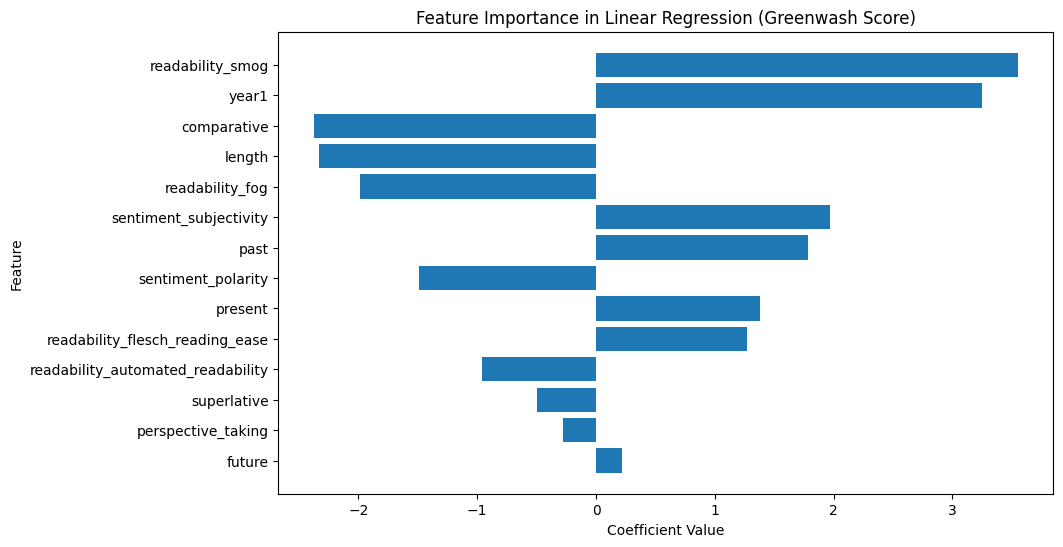

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



# 讀取數據
df = pd.concat([hm_features_overlapping_filtered, hm_features_non_overlapping_filtered]).copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()
